<a href="https://colab.research.google.com/github/Abhinavsarva/Trader-Behavior-Insights/blob/main/Trader_Behavior_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
hs = pd.read_csv('historical_data.csv', low_memory= False)

In [ ]:
hs.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [ ]:
fe = pd.read_csv('fear_greed_index.csv', low_memory= False)

In [ ]:
fe.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


Data Parsing


In [ ]:
 fe['date'] = pd.to_datetime(fe['date'], errors='coerce')
 hs['Timestamp IST'] = pd.to_datetime(hs['Timestamp IST'], errors='coerce')

Missing Value Check

In [ ]:
hs.isna().sum()


,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,131999
Start Position,0
Direction,0
Closed PnL,0


In [ ]:
fe.isna().sum()

,0
timestamp,0
value,0
classification,0
date,0


Convert Timestamp to Datetime

In [ ]:
hs['Timestamp'] = pd.to_datetime(hs['Timestamp'], errors='coerce')

hs['date'] = hs['Timestamp'].dt.date


hs[['Timestamp', 'date']].head()

,Timestamp,date
0,1970-01-01 00:28:50,1970-01-01
1,1970-01-01 00:28:50,1970-01-01
2,1970-01-01 00:28:50,1970-01-01
3,1970-01-01 00:28:50,1970-01-01
4,1970-01-01 00:28:50,1970-01-01


In [ ]:
hs['Timestamp'].head(10)

,Timestamp
0,1970-01-01 00:28:50
1,1970-01-01 00:28:50
2,1970-01-01 00:28:50
3,1970-01-01 00:28:50
4,1970-01-01 00:28:50
5,1970-01-01 00:28:50
6,1970-01-01 00:28:50
7,1970-01-01 00:28:50
8,1970-01-01 00:28:50
9,1970-01-01 00:28:50


Data Cleaning

In [ ]:
hs["Date"] = hs["Timestamp"].dt.date
print(hs.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-02-12 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-02-12 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-02-12 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-02-12 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-02-12 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0

In [ ]:
hs = hs.drop(columns=["Timestamp", "date", "Date"], errors='ignore')


hs["Timestamp IST"] = pd.to_datetime(hs["Timestamp IST"], errors='coerce')


print(hs.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-02-12 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-02-12 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-02-12 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-02-12 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-02-12 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0

Shape of Data

In [ ]:
print("Trades shape:", hs.shape)
print("Fear & Greed shape:", fe.shape)

Trades shape: (69811, 15)
Fear & Greed shape: (2644, 4)


Change Date Time Format

In [ ]:
fe["date"] = pd.to_datetime(fe["date"], errors='coerce')

Mearge Dataset

In [ ]:
hs['date'] = pd.to_datetime(hs['Timestamp IST']).dt.date # Extract the date from the 'Timestamp IST' column
hs['date'] = pd.to_datetime(hs['date']) # Convert the date column to datetime64[ns]
merged_df = pd.merge(hs, fe, on="date", how="inner")
print("Merged Data Shape:", merged_df.shape)
print(merged_df.head())

Merged Data Shape: (14718, 19)
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-02-12 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-02-12 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-02-12 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-02-12 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-02-12 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction H

/tmp/ipython-input-2805022671.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=daily_pnl, x='classification', y='Closed PnL', estimator='mean', ci=None, palette='coolwarm')
/tmp/ipython-input-2805022671.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_pnl, x='classification', y='Closed PnL', estimator='mean', ci=None, palette='coolwarm')


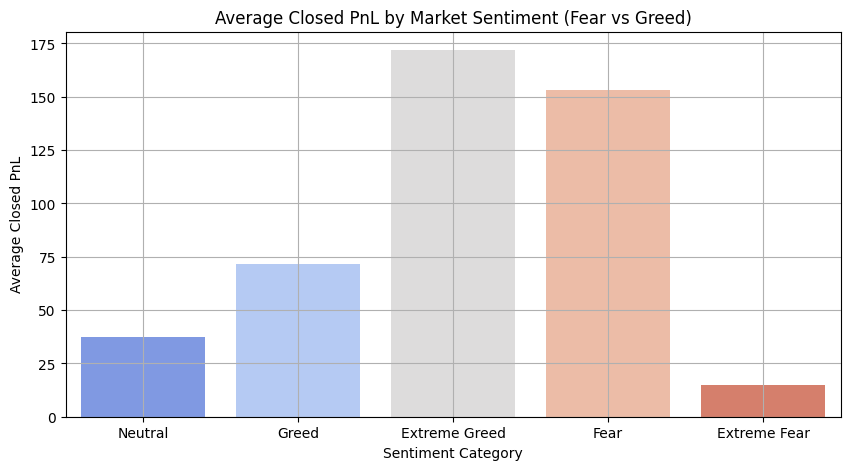

In [ ]:
daily_pnl = merged_df.groupby(['date', 'classification'])['Closed PnL'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=daily_pnl, x='classification', y='Closed PnL', estimator='mean', ci=None, palette='coolwarm')
plt.title("Average Closed PnL by Market Sentiment (Fear vs Greed)")
plt.xlabel("Sentiment Category")
plt.ylabel("Average Closed PnL")
plt.grid(True)
plt.show()


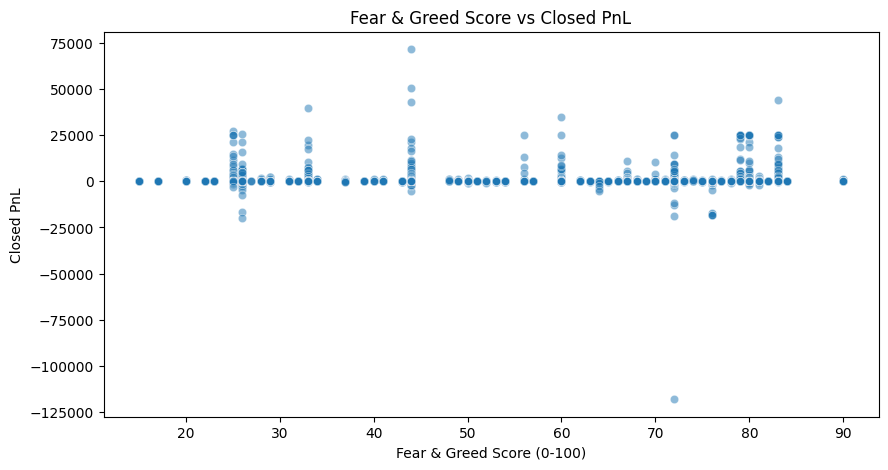

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=merged_df, x='value', y='Closed PnL', alpha=0.5)
plt.title("Fear & Greed Score vs Closed PnL")
plt.xlabel("Fear & Greed Score (0-100)")
plt.ylabel("Closed PnL")
plt.show()


Fear & Greed vs Number of Trades

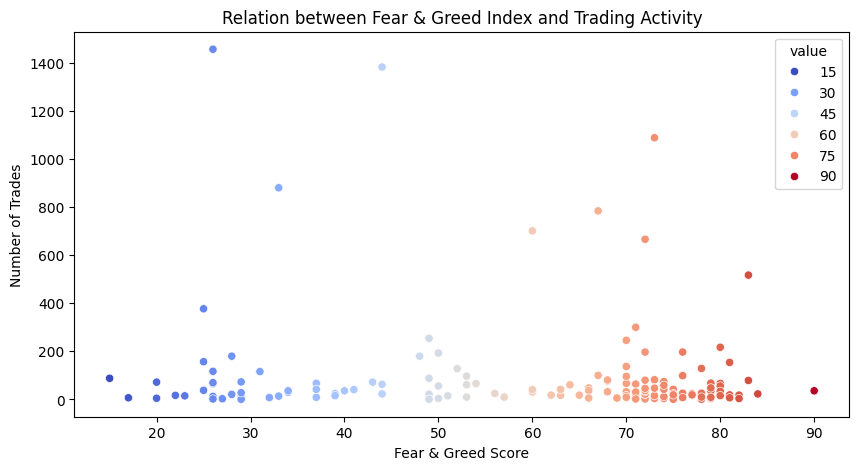

In [ ]:
daily_trade_count = merged_df.groupby("date").size().reset_index(name="trade_count")

plt.figure(figsize=(10,5))
sns.scatterplot(data=daily_trade_count.merge(fe, on="date"),
                x="value", y="trade_count", hue="value", palette="coolwarm")
plt.title("Relation between Fear & Greed Index and Trading Activity")
plt.xlabel("Fear & Greed Score")
plt.ylabel("Number of Trades")
plt.show()

Average PnL vs Fear & Greed

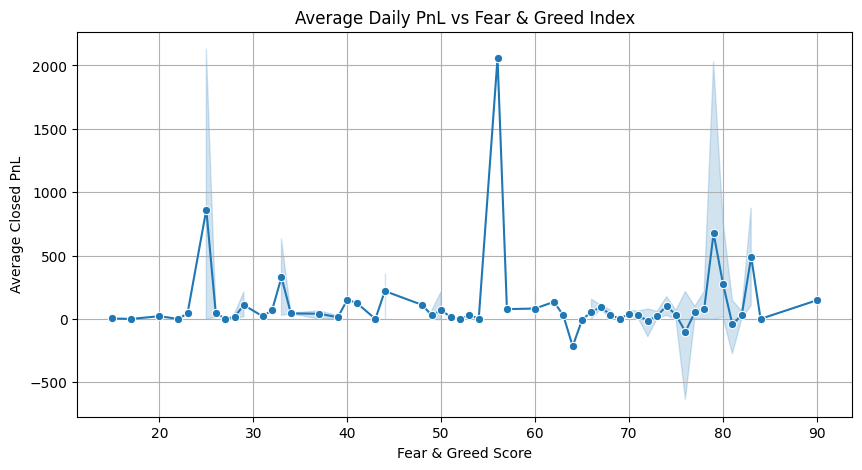

In [ ]:
avg_pnl = merged_df.groupby("date")["Closed PnL"].mean().reset_index()
combined = pd.merge(avg_pnl, fe, on="date", how="inner")

plt.figure(figsize=(10,5))
sns.lineplot(data=combined, x="value", y="Closed PnL", marker="o")
plt.title("Average Daily PnL vs Fear & Greed Index")
plt.xlabel("Fear & Greed Score")
plt.ylabel("Average Closed PnL")
plt.grid(True)
plt.show()